In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Import data from csv file, create headers for each column based on the LabView VI.
df = pd.read_csv('bang_sine.csv', index_col=False, skiprows=26, delimiter='\t',
                names=['time_s', 'goal_deg', 'true_deg', 'vel_deg', 'amp', 'freq_hz',
                         'sin0_or_sqr1', 'cmd_sig', 'controller'])
df.insert(3, 'error', df['goal_deg'] - df['true_deg'], True)
df.head()

,time_s,goal_deg,true_deg,error,vel_deg,amp,freq_hz,sin0_or_sqr1,cmd_sig,controller
0,0.015911,2.735203,-0.041052,2.776255,4.868140,113.0,0.25,0.0,255.75,0.0
1,0.016411,2.823944,-0.049307,2.873251,5.122314,113.0,0.25,0.0,255.75,0.0
2,0.016911,2.912665,-0.058401,2.971066,5.196811,113.0,0.25,0.0,255.75,0.0
3,0.017411,3.001402,-0.068066,3.069468,5.031791,113.0,0.25,0.0,255.75,0.0
4,0.017912,3.090138,-0.078068,3.168206,4.564700,113.0,0.25,0.0,255.75,0.0


<Axes: xlabel='time_s'>

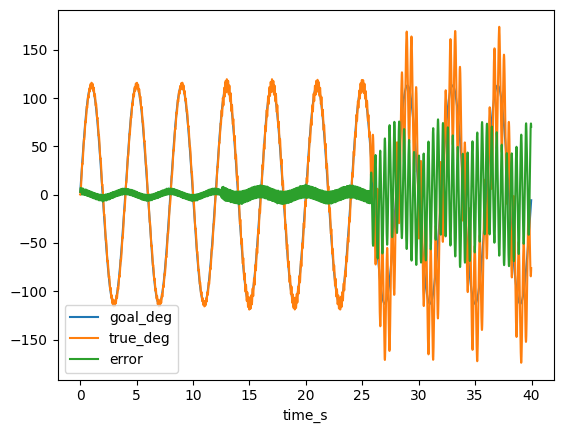

In [27]:
df.plot(x="time_s", y=['goal_deg', 'true_deg','error'])

<Axes: xlabel='time_s'>

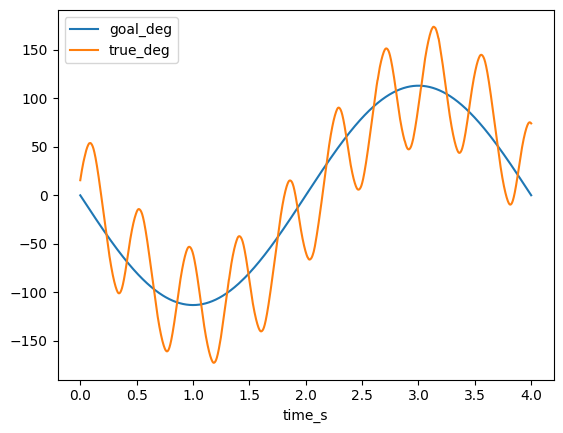

In [28]:
# Isolate one cycle
df = df[df['time_s'] > 34]
df = df[df['time_s'] < 38]

df['time_s'] = df['time_s'] - df['time_s'].min()

df.plot(x="time_s", y=['goal_deg', 'true_deg'])

In [29]:
# Mean, sdt, rms error
mean_error = np.mean(abs(df['error']))
std_error = np.std(df['error'])
rms_error = np.sqrt(np.mean(np.square(df['error'])))
print(f'mean: {mean_error} \nstd: {std_error} \nrms: {rms_error}')

mean: 38.03631009281851 
std: 43.029927497342804 
rms: 43.03002403956414


In [30]:
# Command statistics
command_mean = np.mean(abs(df['cmd_sig']))
command_std = np.std(df['cmd_sig'])
rms_command = np.sqrt(np.mean(np.square(df['cmd_sig'])))
print(f'mean: {command_mean} \nstd: {command_std} \nrms: {rms_command}')

mean: 1023.0 
std: 1022.9415408641097 
rms: 1023.0


In [31]:
# Find percent overshoot
max = df['true_deg'].max()
overshoot = max - df['goal_deg'].max()
pc_overshoot = max/df['goal_deg'].max()
print(overshoot, pc_overshoot)

60.703793000000005 1.5372017269805922


In [32]:
# Rise and settling time
rise = 0.86749 # seconds
# Settle not applicable

### 0.25 effort
error

mean: 0.03507491590214087 

std: 4.183372184983388 

rms: 4.183519222833598

command

mean: 2.2811544342507646 

std: 255.73982645346246 

rms: 255.75

### 0.5 effort
error

mean: -0.07670322587526644 

std: 5.06012774116136 

rms: 5.0607090552343

command

mean: -5.584201279959845 

std: 511.4695168786355 

rms: 511.5

### 1 effort
error 

mean: 1.667094946872646 

std: 42.52830630386957 

rms: 42.56096853500447

command

mean: 28.523737754333084 

std: 1022.6022669564751 

rms: 1023.0